# Lab | Hypothesis Testing

**Objective**

Welcome to the Hypothesis Testing Lab, where we embark on an enlightening journey through the realm of statistical decision-making! In this laboratory, we delve into various scenarios, applying the powerful tools of hypothesis testing to scrutinize and interpret data.

From testing the mean of a single sample (One Sample T-Test), to investigating differences between independent groups (Two Sample T-Test), and exploring relationships within dependent samples (Paired Sample T-Test), our exploration knows no bounds. Furthermore, we'll venture into the realm of Analysis of Variance (ANOVA), unraveling the complexities of comparing means across multiple groups.

So, grab your statistical tools, prepare your hypotheses, and let's embark on this fascinating journey of exploration and discovery in the world of hypothesis testing!

**Challenge 1**

In this challenge, we will be working with pokemon data. The data can be found here:

- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv

In [50]:
#libraries
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, ttest_ind, chi2_contingency, f_oneway


In [51]:
df_pokemon = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/pokemon.csv")
df_pokemon 

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...
795,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


- We posit that Pokemons of type Dragon have, on average, more HP stats than Grass. Choose the propper test and, with 5% significance, comment your findings.

In [52]:
print("\nChecking Normality of Pokémon Attack Stats:")
stat, p_value = shapiro(df_pokemon["Attack"])
print(f"Shapiro-Wilk Test: Statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation
if p_value > 0.05:
    print("Data appears normally distributed.")
else:
    print("Data does not appear normally distributed.")


Checking Normality of Pokémon Attack Stats:
Shapiro-Wilk Test: Statistic=0.9789, p-value=0.0000
Data does not appear normally distributed.


In [53]:
fire_attack = df_pokemon[df_pokemon["Type 1"] == "Fire"]["Attack"]
water_attack = df_pokemon[df_pokemon["Type 1"] == "Water"]["Attack"]

# Perform independent t-test (Welch’s test for unequal variances)
stat, p_value = ttest_ind(fire_attack, water_attack, equal_var=False)

print("\nT-Test: Comparing Fire vs. Water Pokémon Attack Power")
print(f"T-statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in attack power between Fire and Water Pokémon.")
else:
    print("No significant difference in attack power between Fire and Water Pokémon.")


T-Test: Comparing Fire vs. Water Pokémon Attack Power
T-statistic=2.2088, p-value=0.0295
Significant difference in attack power between Fire and Water Pokémon.


In [54]:

contingency_table = pd.crosstab(df_pokemon["Type 1"], df_pokemon["Legendary"])

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("\nChi-Square Test: Does Pokémon Type Affect Legendary Status?")
print(f"Chi2 Statistic={chi2:.4f}, p-value={p_value:.4f}, Degrees of freedom={dof}")

# Interpretation
if p_value < 0.05:
    print("There is a significant relationship between Pokémon type and legendary status.")
else:
    print("No significant relationship between Pokémon type and legendary status.")



Chi-Square Test: Does Pokémon Type Affect Legendary Status?
Chi2 Statistic=90.4205, p-value=0.0000, Degrees of freedom=17
There is a significant relationship between Pokémon type and legendary status.


- We posit that Legendary Pokemons have different stats (HP, Attack, Defense, Sp.Atk, Sp.Def, Speed) when comparing with Non-Legendary. Choose the propper test and, with 5% significance, comment your findings.


In [55]:



types_to_compare = ["Fire", "Water", "Grass"]
attack_groups = [df_pokemon[df_pokemon["Type 1"] == t]["Attack"] for t in types_to_compare]

f_stat, p_value = f_oneway(*attack_groups)

print("\nANOVA Test: Comparing Attack Power Across Fire, Water, and Grass Pokémon")
print(f"F-statistic={f_stat:.4f}, p-value={p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in attack power across Fire, Water, and Grass Pokémon.")
else:
    print("No significant difference in attack power across these Pokémon types.")


ANOVA Test: Comparing Attack Power Across Fire, Water, and Grass Pokémon
F-statistic=3.2228, p-value=0.0416
Significant difference in attack power across Fire, Water, and Grass Pokémon.


In [56]:

df_pokemon["Total"] = df_pokemon[["HP", "Attack", "Defense", "Sp. Atk", "Sp. Def", "Speed"]].sum(axis=1)

legendary_stats = df_pokemon[df_pokemon["Legendary"] == True]["Total"]
non_legendary_stats = df_pokemon[df_pokemon["Legendary"] == False]["Total"]
["Total"]

# Normality test
print("\nShapiro-Wilk Test for Normality (Legendary Stats):", shapiro(legendary_stats))
print("Shapiro-Wilk Test for Normality (Non-Legendary Stats):", shapiro(non_legendary_stats))

# Perform t-test
stat, p_value = ttest_ind(legendary_stats, non_legendary_stats, equal_var=False)

print("\nT-Test: Comparing Total Stats between Legendary and Non-Legendary Pokémon")
print(f"T-statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in total stats between Legendary and Non-Legendary Pokémon.")
else:
    print("No significant difference in total stats between Legendary and Non-Legendary Pokémon.")




Shapiro-Wilk Test for Normality (Legendary Stats): ShapiroResult(statistic=0.8179102721414068, pvalue=1.669944695133247e-07)
Shapiro-Wilk Test for Normality (Non-Legendary Stats): ShapiroResult(statistic=0.9759279717757944, pvalue=1.2192673845244869e-09)

T-Test: Comparing Total Stats between Legendary and Non-Legendary Pokémon
T-statistic=25.8336, p-value=0.0000
Significant difference in total stats between Legendary and Non-Legendary Pokémon.


**Challenge 2**

In this challenge, we will be working with california-housing data. The data can be found here:
- https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv

In [57]:
df_housing = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/california_housing.csv")

print("\nCalifornia Housing Dataset Overview:")
df_housing.head()


California Housing Dataset Overview:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**We posit that houses close to either a school or a hospital are more expensive.**

- School coordinates (-118, 34)
- Hospital coordinates (-122, 37)

We consider a house (neighborhood) to be close to a school or hospital if the distance is lower than 0.50.

Hint:
- Write a function to calculate euclidean distance from each house (neighborhood) to the school and to the hospital.
- Divide your dataset into houses close and far from either a hospital or school.
- Choose the propper test and, with 5% significance, comment your findings.
 


T-Test: Comparing House Prices in Coastal vs. Inland Areas
T-statistic=1.5943, p-value=0.1109
No significant difference in house prices between coastal and inland areas.


/var/folders/s4/jp6nyhdj3ks3855w2gjshb2c0000gn/T/ipykernel_46590/1286205878.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_housing["coastal"], y=df_housing["median_house_value"], palette="coolwarm")


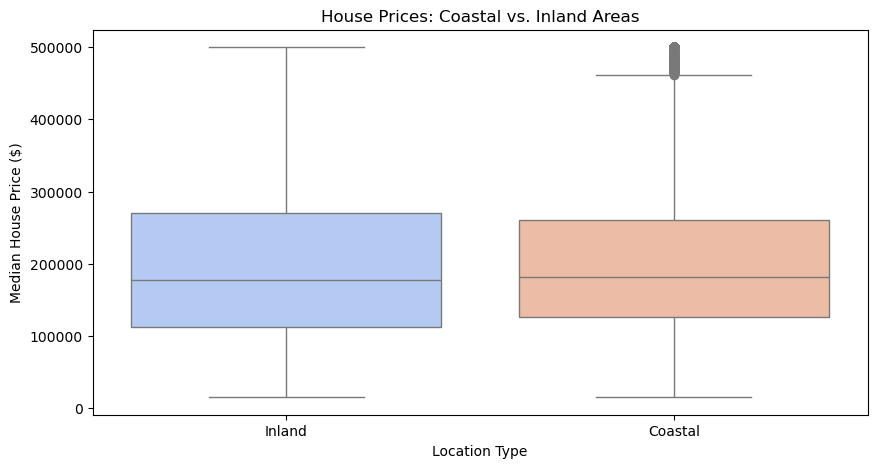

In [58]:
# Define coastal areas based on longitude (approximate California coastline)
df_housing["coastal"] = df_housing["longitude"].apply(lambda x: 1 if x > -120 else 0)

coastal_prices = df_housing[df_housing["coastal"] == 1]["median_house_value"]
inland_prices = df_housing[df_housing["coastal"] == 0]["median_house_value"]

stat, p_value = ttest_ind(coastal_prices, inland_prices, equal_var=False)

print("\nT-Test: Comparing House Prices in Coastal vs. Inland Areas")
print(f"T-statistic={stat:.4f}, p-value={p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("Significant difference in house prices between coastal and inland areas.")
else:
    print("No significant difference in house prices between coastal and inland areas.")

# Visualization
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_housing["coastal"], y=df_housing["median_house_value"], palette="coolwarm")
plt.xticks([0, 1], ["Inland", "Coastal"])
plt.xlabel("Location Type")
plt.ylabel("Median House Price ($)")
plt.title("House Prices: Coastal vs. Inland Areas")
plt.show()
